In [1]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from utils import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
dataset = load_dataset("data/final_dataset.json")

In [4]:
labels = ['sport','education',"science","startup","career"]
token2idx = {"sport":0,"education":1,"science":2,"startup":3,"career":4}

In [7]:
target = []
features = []
for cls in dataset:
    true_val = None
    for label in labels:
        if cls.startswith(label):
            true_val = label
            break
    if true_val:
        for post in dataset[cls].values():
            target.append(true_val)
            features.append(post['main_text'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [11]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in zip(y_train,X_train)]

In [32]:
model = Doc2Vec(tagged_data, vector_size=20, window=6, min_count=1, workers=4)

In [33]:
test_data = word_tokenize(features[-1].lower())
v2 = model.docvecs.most_similar([model.infer_vector(test_data)])
print("V1_infer", v2)

V1_infer [('career', 0.8171383142471313), ('education', 0.7956113815307617), ('sport', 0.7814397811889648), ('startup', 0.689215898513794), ('science', 0.5847673416137695)]


In [38]:
y_pred = []
for doc in X_test:
    tokenized =  word_tokenize(doc.lower())
    v = model.docvecs.most_similar([model.infer_vector(tokenized)])
    y_pred.append(v[0][0])

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      career       0.18      0.94      0.31       126
   education       0.78      0.23      0.35       345
     science       0.89      0.50      0.64       218
       sport       0.55      0.44      0.49        39
     startup       0.00      0.00      0.00       173

    accuracy                           0.36       901
   macro avg       0.48      0.42      0.36       901
weighted avg       0.56      0.36      0.35       901



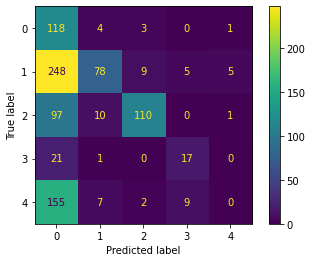

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()